In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score, log_loss
from tqdm import tqdm

## Dataset

dimension of X (2, 100)
dimension of Y (1, 100)


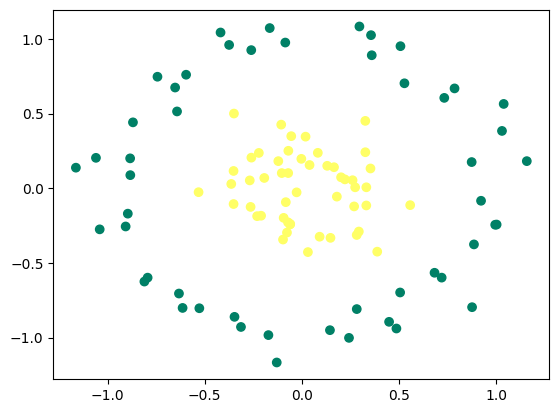

In [5]:
X, y = make_circles(n_samples=100, noise=0.1, factor=0.3, random_state=42)
X = X.T
y = y.reshape(1, y.shape[0])

print('dimension of X', X.shape)
print('dimension of Y', y.shape)

plt.figure()
plt.scatter(X[0,:],X[1,:], c = y, cmap='summer')
plt.show()


## Model

In [6]:
def initialisation(n0, n1, n2):
    W1 = np.random.randn(n1, n0)
    b1 = np.zeros((n1, 1))
    W2 = np.random.randn(n2, n1)
    b2 = np.zeros((n2, 1))

    return {
        "W1" : W1,
        "b1" : b1,
        "W2" : W2,
        "b2" : b2
    }

In [7]:
def forward_propagation(X, parameters):

    Z1 = parameters["W1"] @ X + parameters["b1"]
    A1 = 1 / (1 + np.exp(-Z1))
    
    Z2 = parameters["W2"] @ A1 + parameters["b2"]
    A2 = 1 / (1 + np.exp(-Z2))
    return {
        'A1' : A1,
        'A2' : A2,
    }

In [8]:
def back_propagation(X, y, activations, parameters):
    A1 = activations["A1"]
    A2 = activations["A2"]
    W2 = parameters["W2"]

    m = y.shape[1]
    
    dZ2 = A2 - y
    dW2 = 1/m * (dZ2 @ (A1.T))
    db2 = 1/m * np.sum(dZ2, axis=1, keepdims = True)

    dZ1 = ((W2.T) @ dZ2) * A1 * (1 - A1)
    dW1 = 1/m * (dZ1 @ (X.T))
    db1 = 1/m * np.sum(dZ1, axis=1, keepdims = True)

    return {
        'dW1' : dW1,
        'db1' : db1,
        'dW2' : dW2,
        'db2' : db2
    }

In [9]:
def update(parametres, gradients, alpha):
    
    W1 = parametres['W1']
    b1 = parametres['b1']
    W2 = parametres['W2']
    b2 = parametres['b2']

    dW1 = gradients['dW1']
    db1 = gradients['db1']
    dW2 = gradients['dW2']
    db2 = gradients['db2']

    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2


    return {
    'W1' : W1,
    'b1' : b1,
    'W2' : W2,
    'b2' : b2
    }

In [10]:
def predict(X, parameters):
    activations = forward_propagation(X, parameters)
    return activations['A2'] >= 0.5

In [25]:
def neural_network(X_train, y_train, n1, learning_rate = 0.1, n_iter = 400):
    
    # initialisation
    n0 = X_train.shape[0]
    n2 = y_train.shape[0]
    np.random.seed(0)
    parameters = initialisation(n0, n1, n2)
    
    train_loss = []
    train_acc = []

    # Générer une grille de points
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.01
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # training
    for i in tqdm(range(n_iter)):
        activations = forward_propagation(X_train, parameters)
        gradients = back_propagation(X_train, y_train, activations, parameters)
        parameters = update(parameters, gradients, learning_rate)

        if i % 10 == 0:
            #Train
            train_loss.append(log_loss(y_train.flatten(), activations['A2'].flatten()))
            y_pred = predict(X_train, parameters)
            current_accuracy = accuracy_score(y_train.flatten(), y_pred.flatten())
            train_acc.append(current_accuracy)

    # Prédire la sortie pour chaque point de la grille
    Z = predict(np.c_[xx.ravel(), yy.ravel()].T, parameters)
    Z = Z.reshape(xx.shape)
    
    plt.figure(figsize = (14, 4))

    plt.subplot(1, 3, 1)
    plt.plot(train_loss, label='train loss')
    plt.legend()

    plt.subplot(1, 3, 2)
    plt.plot(train_acc, label='train acc')
    plt.legend()

    plt.subplot(1, 3, 3)
    plt.contour(xx, yy, Z, colors='red', levels=[0.5])
    plt.contourf(xx, yy, Z, alpha=0.75, cmap='summer')
    plt.scatter(X[0,:], X[1,:], c=y, cmap='summer')

    plt.show()

    return parameters


## Training

100%|██████████| 1000/1000 [00:00<00:00, 2210.78it/s]


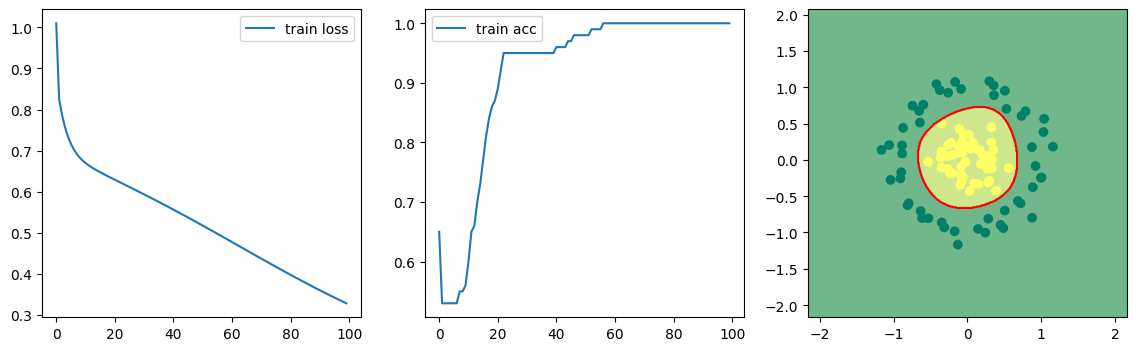

In [32]:
parameters = neural_network(X, y, n1=32, n_iter=1000, learning_rate=0.1)